In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
pollution_meteo = pd.read_csv("output/pollution_meteo_clean.csv")
pollution_meteo["timestamp"] = pd.to_datetime(pollution_meteo["timestamp"])

pollution_meteo.info()
pollution_meteo.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1027828 entries, 0 to 1027827
Data columns (total 15 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   station_id         1027828 non-null  object        
 1   timestamp          1027828 non-null  datetime64[ns]
 2   pollutant          1027828 non-null  object        
 3   value              1027828 non-null  float64       
 4   unit               1027828 non-null  object        
 5   station_name       1027828 non-null  object        
 6   city               1027828 non-null  object        
 7   lat                1027828 non-null  float64       
 8   lon                1027828 non-null  float64       
 9   station_type       1027828 non-null  object        
 10  temperature_c      907309 non-null   float64       
 11  humidity_pct       907309 non-null   float64       
 12  wind_speed_kmh     907309 non-null   float64       
 13  precipitation_mm   907309 n

,station_id,timestamp,pollutant,value,unit,station_name,city,lat,lon,station_type,temperature_c,humidity_pct,wind_speed_kmh,precipitation_mm,weather_condition
0,ST0001,2024-01-01 00:00:00,O3,88.30,ug/m3,Paris-urbaine-1,Paris,48.809101,2.329703,urbaine,2.8,57.4,49.4,0.8,pluvieux
1,ST0001,2024-01-01 02:00:00,PM10,47.08,ug/m3,Paris-urbaine-1,Paris,48.809101,2.329703,urbaine,-0.9,45.4,42.3,0.0,pluvieux
2,ST0001,2024-01-01 05:00:00,CO,0.48,mg/m3,Paris-urbaine-1,Paris,48.809101,2.329703,urbaine,NaN,NaN,NaN,NaN,NaN
3,ST0001,2024-01-01 07:00:00,CO,0.90,mg/m3,Paris-urbaine-1,Paris,48.809101,2.329703,urbaine,10.6,94.1,15.8,0.0,nuageux
4,ST0001,2024-01-01 08:00:00,CO,1.58,mg/m3,Paris-urbaine-1,Paris,48.809101,2.329703,urbaine,6.6,73.7,18.7,3.5,pluvieux


<Figure size 800x800 with 0 Axes>

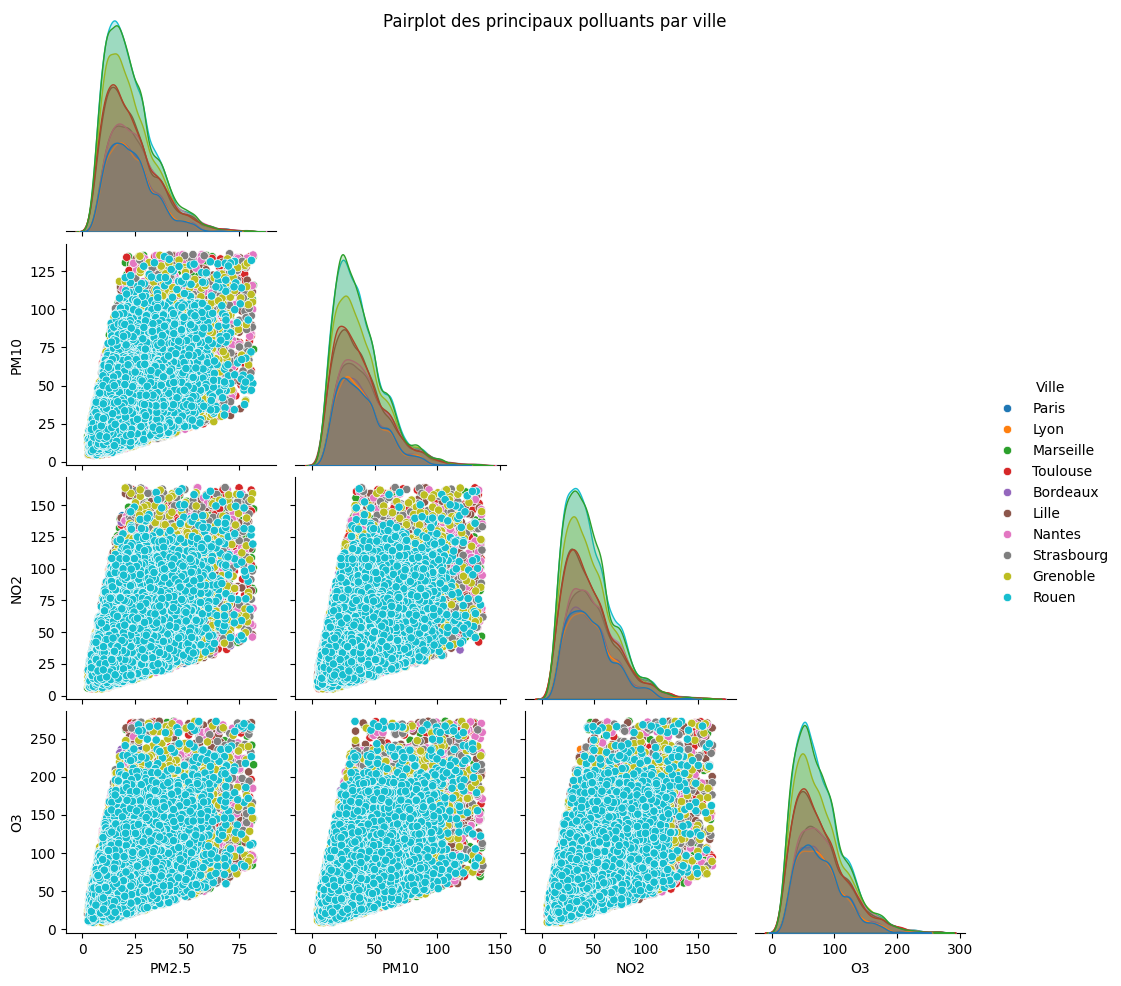

In [50]:
# Pairplot des polluants principaux (PM2.5, PM10, NO2, O3).
pollutants = ["PM2.5", "PM10", "NO2", "O3"]

df_pair = (
    pollution_meteo[pollution_meteo["pollutant"].isin(pollutants)]
    .pivot_table(
        index=["station_id", "city", "timestamp"],
        columns="pollutant",
        values="value",
        aggfunc="mean"
    )
    .dropna()
    .reset_index()
)

plt.figure(figsize=(8,8))
g = sns.pairplot(
    df_pair,
    vars=pollutants,
    hue="city",
    diag_kind="kde",
    corner=True,
)
g._legend.set_title("Ville")
plt.suptitle("Pairplot des principaux polluants par ville")

plt.savefig("C:/Users/Administrateur/Documents/M2i_CDSD_TDTP/spark/TP_Analyse_Qualite_Air/output/figures/pairplot.png")

C:\Users\Administrateur\AppData\Local\Temp\ipykernel_28356\356377774.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_violin_plot["season"] = df_violin_plot["timestamp"].dt.month % 12 // 3


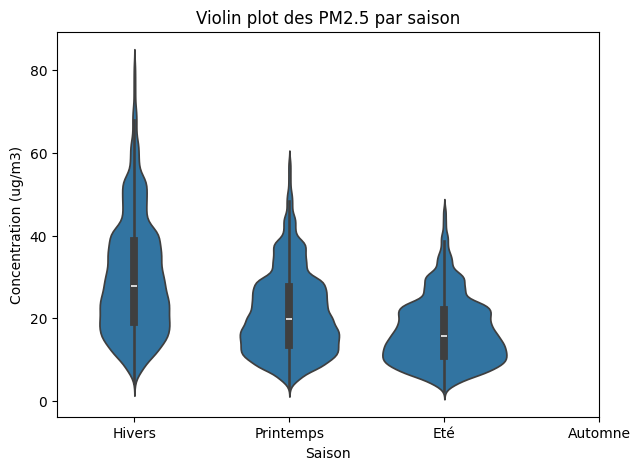

In [51]:
# Violin plot des PM2.5 par saison.
df_violin_plot = pollution_meteo[pollution_meteo["pollutant"] == "PM2.5"]
df_violin_plot["season"] = df_violin_plot["timestamp"].dt.month % 12 // 3

plt.figure(figsize=(7,5))
plt.title("Violin plot des PM2.5 par saison")
sns.violinplot(df_violin_plot, x="season", y="value")
plt.xlabel("Saison")
plt.ylabel("Concentration (ug/m3)")
plt.xticks(np.arange(4), labels=["Hivers", "Printemps", "Eté", "Automne"])

plt.savefig("C:/Users/Administrateur/Documents/M2i_CDSD_TDTP/spark/TP_Analyse_Qualite_Air/output/figures/violin_plot.png")

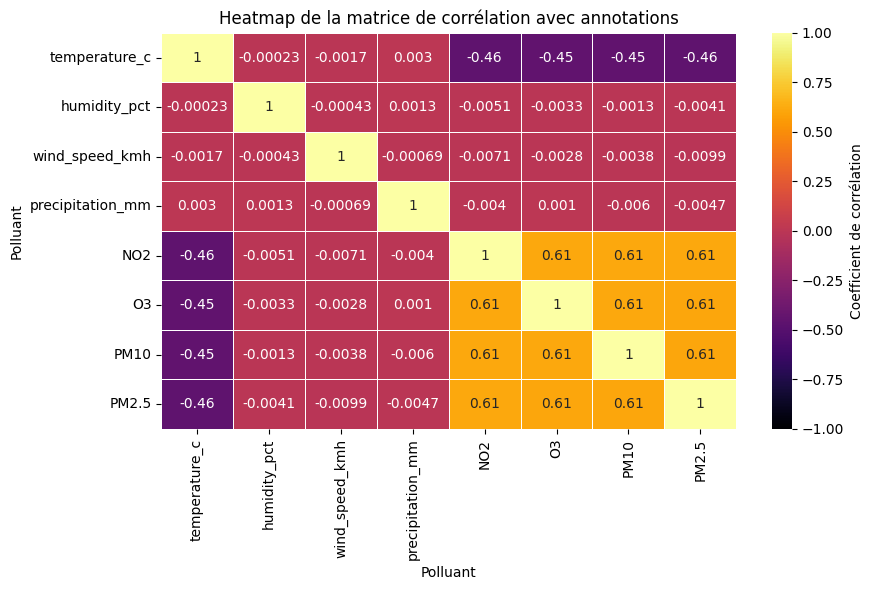

In [ ]:
# Heatmap de la matrice de corrélation avec annotations.
df_pollutant = (
    pollution_meteo[pollution_meteo["pollutant"].isin(pollutants)]
    .pivot_table(
        index=["temperature_c", "humidity_pct", "wind_speed_kmh", "precipitation_mm"],
        columns="pollutant",
        values="value"
    )
    .dropna()
    .reset_index()
)
corr_matrix = df_pollutant.corr(
    method="spearman"
)

plt.figure(figsize=(9,6))
plt.title("Heatmap de la matrice de corrélation avec annotations")
sns.heatmap(
    corr_matrix,
    annot=True,
    vmin=-1,
    vmax=1,
    cmap="inferno",
    linewidths=0.5,
    cbar_kws={'label': 'Coefficient de corrélation'},
)
plt.xlabel("Polluant")
plt.ylabel("Polluant")
plt.tight_layout()

plt.savefig("C:/Users/Administrateur/Documents/M2i_CDSD_TDTP/spark/TP_Analyse_Qualite_Air/output/figures/heatmap_polluant.png")

# => Corrélation Température et polluant

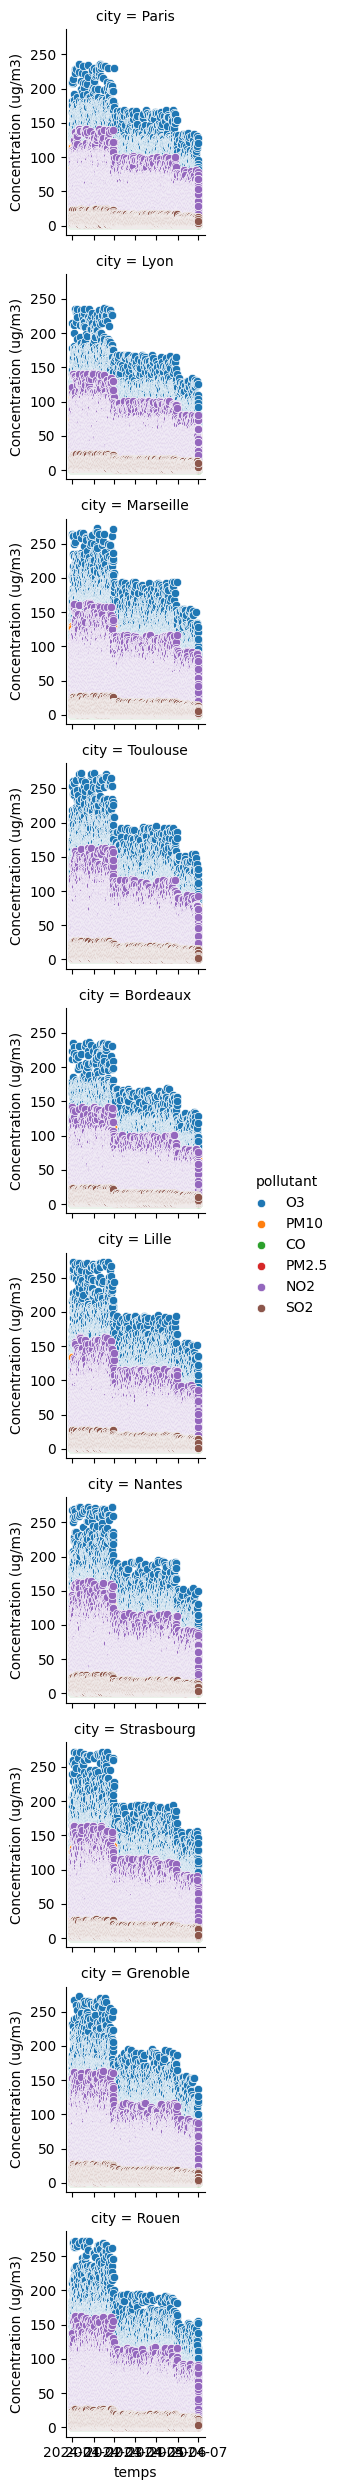

In [53]:
# FacetGrid : evolution temporelle par ville (une ligne par ville).
g = sns.FacetGrid(pollution_meteo, col="city", hue="pollutant", height=2.5, col_wrap=1)
g.map_dataframe(sns.scatterplot, x="timestamp", y="value")
g.set_axis_labels("temps", "Concentration (ug/m3)")
g.add_legend()
g.tight_layout()
g.savefig("output/figures/facet_plot.png")

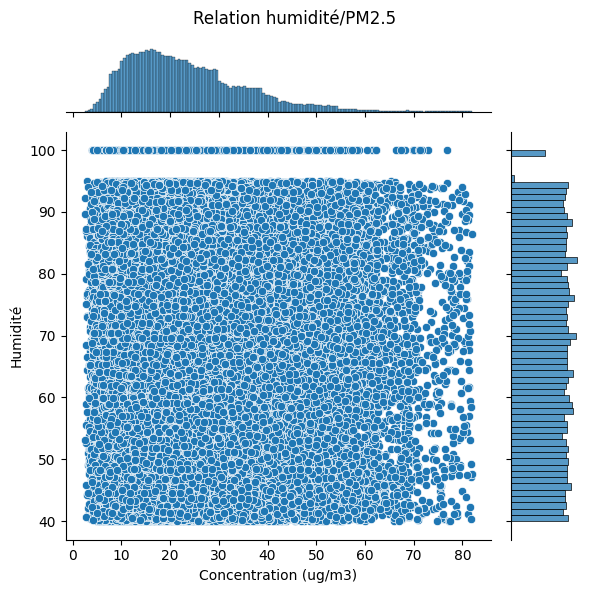

In [54]:
# Jointplot : relation humidité/PM2.5 avec distributions marginales.
j = sns.jointplot(
    pollution_meteo[pollution_meteo["pollutant"] == "PM2.5"],
    x="value",
    y="humidity_pct",
)
j.figure.suptitle("Relation humidité/PM2.5")
j.set_axis_labels("Concentration (ug/m3)", "Humidité")
j.figure.tight_layout()

j.savefig("output/figures/join_plot.png")